## Group members

- Hanping Wang
- Margaret Mangwende 
- Definate Mudarikwa 

# EDA & Preprocessing Notebook

**Goals**  
- Dataset summary & schema  
- Exploratory Data Analysis (EDA)  
- Missingness & imputation  
- Outlier analysis (IQR)  
- Feature scaling  
- Feature extraction (PCA) & selection (mutual information)  
- Class imbalance check & simple resampling example  
- Train/validation split + baseline models (Logistic Regression, Random Forest) 



## 1. Load data


In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\14583\Desktop\heart disease\heart data\heart_disease_uci.csv")
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nFirst 5 rows:")
display(df.head())
print(df.info())
print(df.describe().T)



Shape: (920, 16)

Dtypes:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

First 5 rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
          count        mean         std   min     25%    50%     75%    max
id        920.0  460.500000  265.725422   1.0  2


## 2. Missing value and target column



In [10]:

print(df.isnull().sum())
print("\nValue count:\n",df['num'].value_counts())

# Create binary value for target column
df['target'] = (df['num'] > 0).astype(int)
        
print("\nTarget value counts:")
print(df['target'].value_counts(dropna=False))


# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill numeric columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.drop(columns=['id', 'dataset', 'num'], inplace=True)

# Check the new columns
print(df.head())

print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Value count:
 num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Target value counts:
target
1    509
0    411
Name: count, dtype: int64
   age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  target  
0   150.0  False      2.3  downsloping  0.0 

C:\Users\14583\AppData\Local\Temp\ipykernel_36836\3606002256.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])




## 3.Histograms for key numeric features  



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,920.000000,920,920,920.000000,920.000000,920,920,920.000000,920,920.000000,920,920.000000,920,920.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,726,496,NaN,NaN,782,553,NaN,583,NaN,654,NaN,682,NaN
mean,53.510870,NaN,NaN,131.995652,199.908696,NaN,NaN,137.692391,NaN,0.853261,NaN,0.227174,NaN,0.553261
std,9.424685,NaN,NaN,18.451300,109.040171,NaN,NaN,25.145235,NaN,1.058049,NaN,0.628936,NaN,0.497426
min,28.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,177.750000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,0.000000,NaN,1.000000


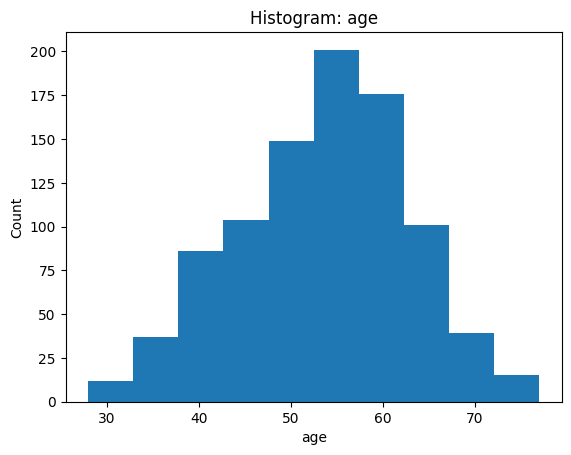

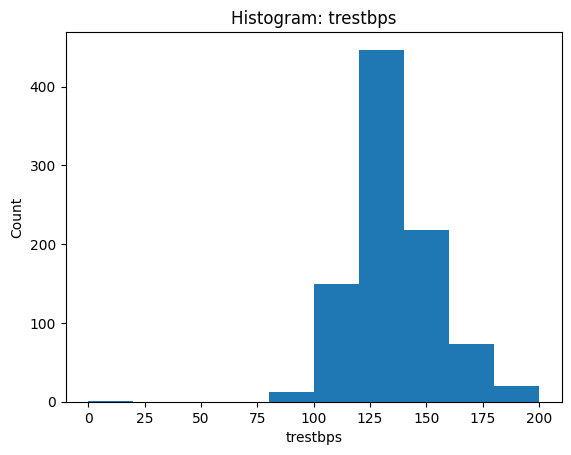

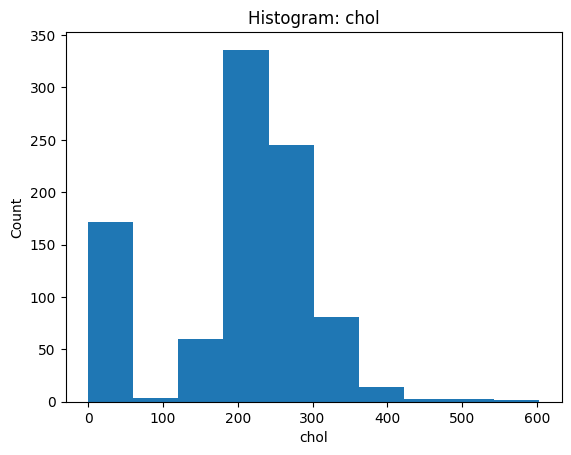

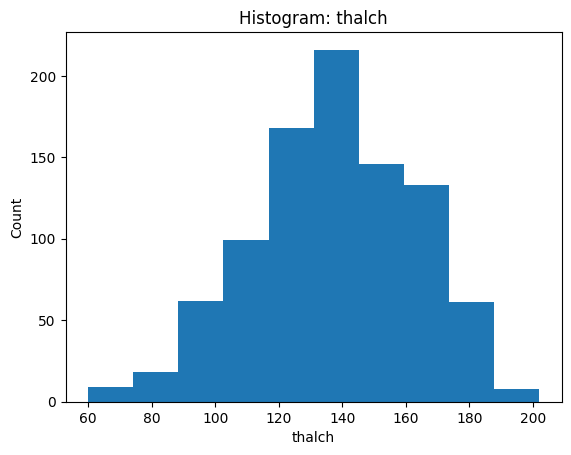

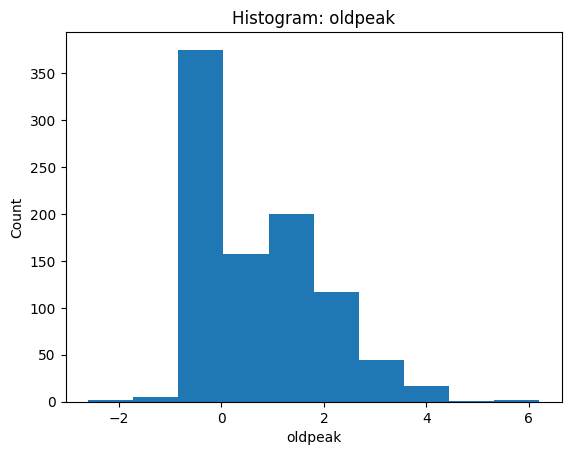

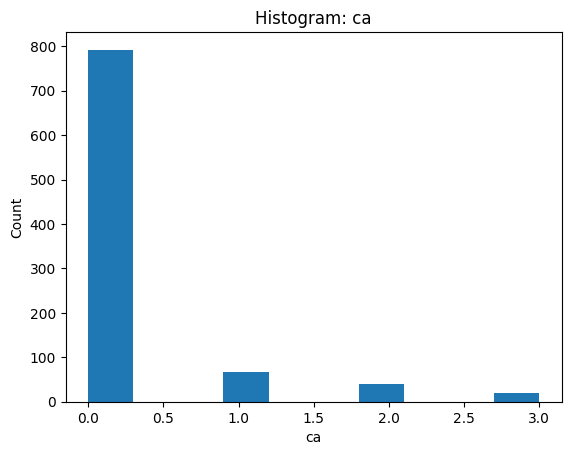

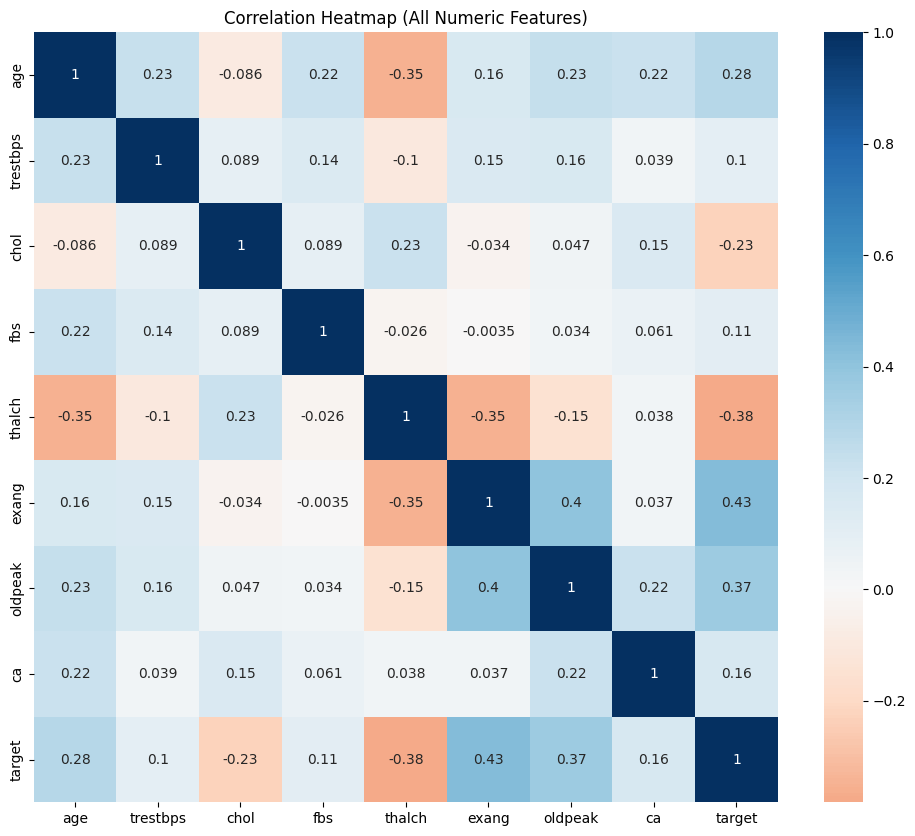

In [11]:

import seaborn as sns
# Descriptive statistics
display(df.describe(include='all'))

# Simple histograms for some numeric features (one figure per plot)
key_num = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ['target','num']][:6]
for c in key_num:
    plt.figure()
    plt.hist(df[c].dropna())
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="RdBu", center=0)
plt.title("Correlation Heatmap (All Numeric Features)")
plt.show()




## 4. Outlier analysis (IQR rule)
For each numeric column, compute IQR and mark observations beyond **Q1 - 1.5×IQR** or **Q3 + 1.5×IQR** as outliers.


 Outlier removal complete (except 'ca')

Number of outliers removed per column:
age: 0
trestbps: 28
chol: 177
thalch: 1
oldpeak: 12
target: 0

Rows before: 920
Rows after:  702
Total rows removed: 218


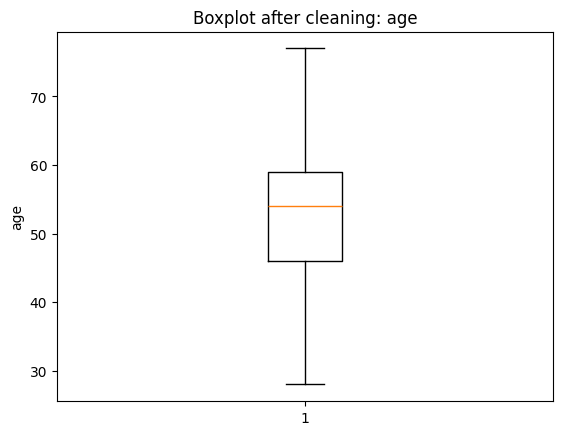

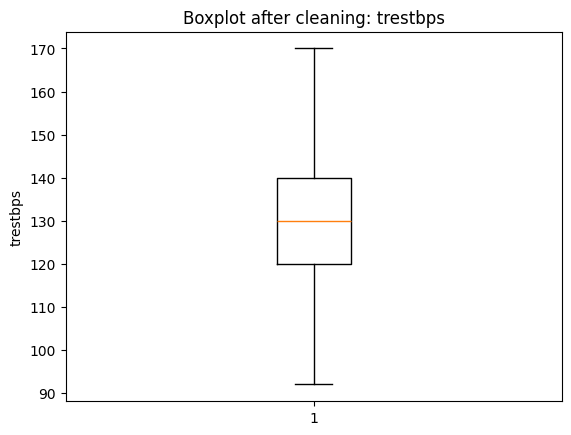

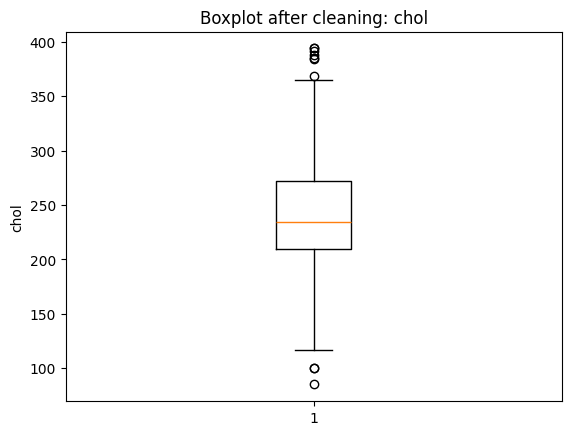

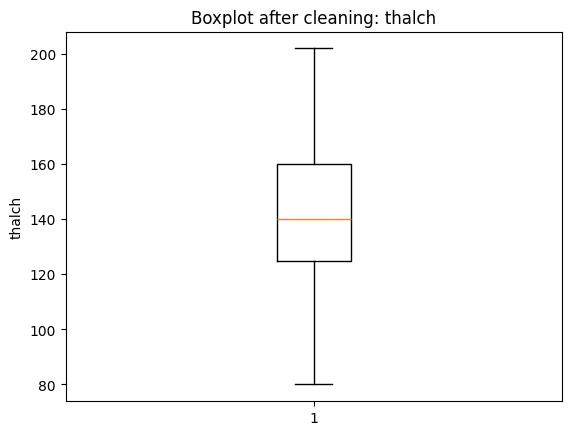

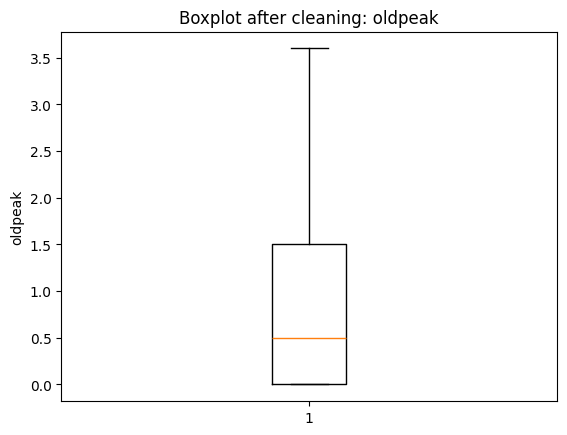

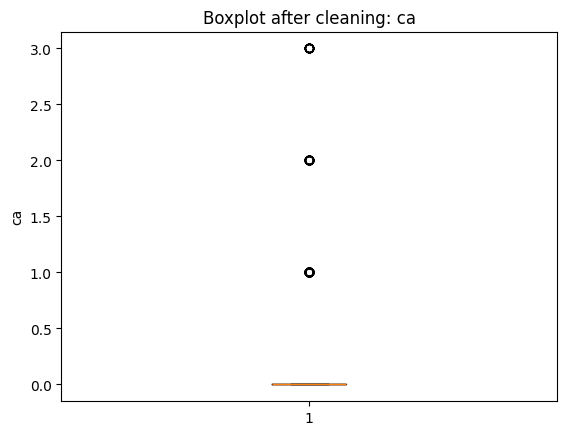

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def find_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (series < lower) | (series > upper)

outlier_counts = {}
rows_before = df.shape[0]

for col in num_cols:
    if col == 'ca': 
        continue
    mask = find_outliers(df[col])
    outlier_counts[col] = mask.sum()
    df = df[~mask] 


rows_after = df.shape[0]
print(" Outlier removal complete (except 'ca')\n")
print("Number of outliers removed per column:")
for k, v in outlier_counts.items():
    print(f"{k}: {v}")

print(f"\nRows before: {rows_before}")
print(f"Rows after:  {rows_after}")
print(f"Total rows removed: {rows_before - rows_after}")

for col in num_cols[:6]:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot after cleaning: {col}")
    plt.ylabel(col)
    plt.show()




## 5. Class balance


Class distribution: Counter({0: 378, 1: 324})


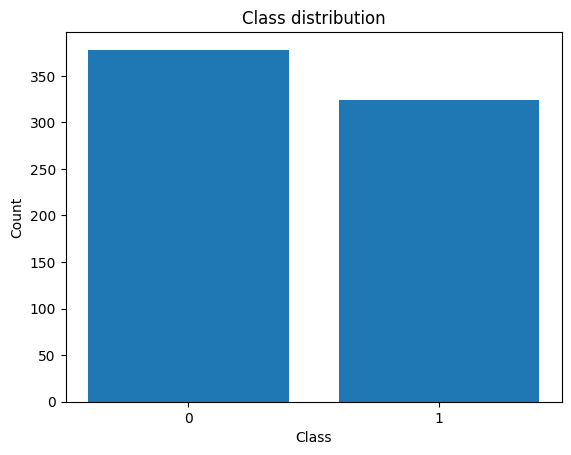

Balanced shape: (648, 14)


In [13]:

from collections import Counter
y = df['target'] if 'target' in df.columns else df['num']
print("Class distribution:", Counter(y))

# quick bar plot
plt.figure()
counts = y.value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Example: quick undersampling (for demo only)
minority = y.value_counts().idxmin()
majority = y.value_counts().idxmax()

df_min = df[df['target']==minority] if 'target' in df.columns else df[df['num']==minority]
df_maj = df[df['target']==majority] if 'target' in df.columns else df[df['num']==majority]

df_maj_sampled = df_maj.sample(n=len(df_min), random_state=42) if len(df_min)>0 else df_maj
df_balanced = pd.concat([df_min, df_maj_sampled]).sample(frac=1, random_state=42)
print("Balanced shape:", df_balanced.shape)




## 6. Encoding & scaling
- One‑hot encode categoricals  
- Standardize numeric features  
- Keep track of pipeline using `ColumnTransformer`


In [14]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Define target column (some datasets use 'target', others use 'num')
target = 'target' if 'target' in df.columns else 'num'
X = df.drop(columns=[target])
y = df[target]

# Separate numeric and categorical features
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Build preprocessing pipeline
# - Standardize numeric features
# - One-hot encode categorical features
preprocess = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

#  Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Combine preprocessing and model into one pipeline
log_reg_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=200))
])

# Train the model
log_reg_model.fit(X_train, y_train)

#Make predictions and evaluate performance
y_pred = log_reg_model.predict(X_test)
y_proba = log_reg_model.predict_proba(X_test)[:, 1]

print(" Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.3f}")


 Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        76
           1       0.76      0.72      0.74        65

    accuracy                           0.77       141
   macro avg       0.77      0.76      0.76       141
weighted avg       0.77      0.77      0.77       141

ROC-AUC Score: 0.816



## 7. Feature extraction & selection



Explained variance ratio: [0.30625272 0.17255241 0.16246572 0.14473493 0.12769217 0.08630204]


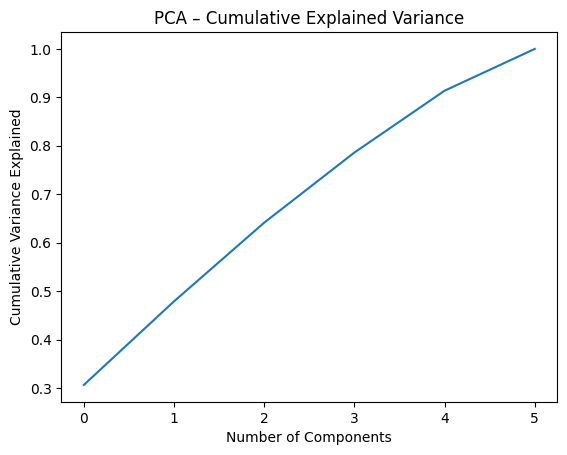

Top 10 features by mutual information:
oldpeak     0.146065
thalch      0.059758
ca          0.047859
age         0.025212
chol        0.014311
trestbps    0.002838
dtype: float64


In [15]:

from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- PCA (reduce numeric features into fewer components) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

pca = PCA(n_components=6)
pca.fit(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA – Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()

# --- Mutual Information (find which features relate most to target) ---
mi = mutual_info_classif(X_scaled, y, random_state=42)
mi_scores = pd.Series(mi, index=num_cols).sort_values(ascending=False)

print("Top 10 features by mutual information:")
print(mi_scores.head(10))



## 8. Baseline model comparison
Compare `LogisticRegression` vs `RandomForestClassifier` with the same preprocessing.


In [16]:

from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline(steps=[('prep', preprocess),
                         ('clf', RandomForestClassifier(n_estimators=200, random_state=7))])
rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)

print("RandomForest:")
print(classification_report(y_test, rf_pred))


RandomForest:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        76
           1       0.71      0.71      0.71        65

    accuracy                           0.73       141
   macro avg       0.73      0.73      0.73       141
weighted avg       0.73      0.73      0.73       141

